In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод.

In [26]:
# стаж преподавателя, стоимость урока
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

# полученный балл ЕГЭ
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [3]:
def standart_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [4]:
def normal_scale(X):
    min_X = X.min()
    max_X = X.max()
    return (X - min_X) / (max_X - min_X)

In [5]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [6]:
# стандартизируем 2-й и 3-й признаки с изменением типа на float
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standart_scale(X_st[:, 1])
X_st[:, 2] = standart_scale(X_st[:, 2])
X_st

array([[ 1.        , -0.70710678, -0.97958969,  1.        ],
       [ 1.        , -0.70710678, -0.56713087,  1.        ],
       [ 1.        , -0.35355339, -0.46401617,  2.        ],
       [ 1.        ,  0.70710678, -0.77336028,  1.        ],
       [ 1.        ,  0.        ,  0.97958969,  2.        ],
       [ 1.        , -1.06066017, -0.36090146,  1.        ],
       [ 1.        ,  0.70710678,  1.08270439,  3.        ],
       [ 1.        ,  2.47487373,  2.11385144,  3.        ],
       [ 1.        , -0.70710678, -1.08270439,  1.        ],
       [ 1.        , -0.35355339,  0.05155735,  2.        ]])

In [7]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        W -= eta * dQ + dReg
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [8]:
W = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [0.3528779  0.37609471 0.89057656 2.47821585], error 3339.309794587891
Iter: 500, weights: [22.46988013  5.051288   -7.15107682 19.61293314], error 41.18551711392165
Iter: 1000, weights: [27.09794638  5.91902119 -6.12718768 16.99413442], error 34.353394582083666
Iter: 1500, weights: [30.27748047  6.02558942 -4.92841849 15.17901901], error 30.79144730445892
Iter: 2000, weights: [32.5471507   6.05060204 -4.02103062 13.88165614], error 28.75873478029851
Iter: 2500, weights: [34.1762218   6.06342991 -3.36456134 12.95029802], error 27.56501488675384
Iter: 3000, weights: [35.34639146  6.07213261 -2.89249863 12.28128228], error 26.844647742636646
Iter: 3500, weights: [36.18701913  6.07833342 -2.5533261  11.80067241], error 26.39790807681201
Iter: 4000, weights: [36.79091897  6.08278295 -2.30966226 11.45540615], error 26.11349185269166
Iter: 4500, weights: [37.22475643  6.08597895 -2.13461533 11.20736925], error 25.928015603628882
Final MSE: 25.804497122647298


In [9]:
W_list = []
reg_list = []

for reg in np.arange(0, 1, 0.05):
    print(f'reg (lambda)={reg}')
    W = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=reg)
    W_list.append(W)
    reg_list.append(reg)

reg (lambda)=0.0
Iter: 0, weights: [ 1.65530825 -0.37123278  1.01705627  2.09008533], error 3282.8490397053147
Iter: 500, weights: [23.44519066  5.14588464 -6.89111449 19.1012251 ], error 39.62291043132382
Iter: 1000, weights: [28.22119834  6.09326728 -5.8870188  16.40040692], error 33.04848252480301
Iter: 1500, weights: [31.66120193  6.21427626 -4.59582357 14.43678236], error 29.54712387452336
Iter: 2000, weights: [34.24174006  6.24331935 -3.56476604 12.96174448], error 27.55267961993627
Iter: 2500, weights: [36.1888518   6.25871524 -2.78019984 11.84856105], error 26.415075991833
Iter: 3000, weights: [37.65921368  6.2696572  -2.18704219 11.007918  ], error 25.766185666001906
Iter: 3500, weights: [38.7696831   6.27784919 -1.73899588 10.37303223], error 25.39605774521132
Iter: 4000, weights: [39.60836213  6.28402863 -1.4006025   9.89353622], error 25.18493627580959
Iter: 4500, weights: [40.24177357  6.28869487 -1.14503046  9.53139734], error 25.064512302510256
Final MSE: 24.995822304347

Iter: 3500, weights: [2.3458052  0.38605149 0.3416337  4.25770052], error 2289.371282218247
Iter: 4000, weights: [2.3458052  0.38605149 0.3416337  4.25770052], error 2289.371282218247
Iter: 4500, weights: [2.3458052  0.38605149 0.3416337  4.25770052], error 2289.371282218247
Final MSE: 2289.371282218247
reg (lambda)=0.45
Iter: 0, weights: [2.04189899 0.71537494 0.57605561 2.57936619], error 2883.999602670671
Iter: 500, weights: [2.12472722 0.35524675 0.31797587 3.86406488], error 2378.8702163810535
Iter: 1000, weights: [2.12472722 0.35524675 0.31797587 3.86406488], error 2378.8702163810535
Iter: 1500, weights: [2.12472722 0.35524675 0.31797587 3.86406488], error 2378.8702163810535
Iter: 2000, weights: [2.12472722 0.35524675 0.31797587 3.86406488], error 2378.8702163810535
Iter: 2500, weights: [2.12472722 0.35524675 0.31797587 3.86406488], error 2378.8702163810535
Iter: 3000, weights: [2.12472722 0.35524675 0.31797587 3.86406488], error 2378.8702163810535
Iter: 3500, weights: [2.1247272

Iter: 2500, weights: [1.21204262 0.21539357 0.2005858  2.22126239], error 2771.669286765749
Iter: 3000, weights: [1.21204262 0.21539357 0.2005858  2.22126239], error 2771.669286765749
Iter: 3500, weights: [1.21204262 0.21539357 0.2005858  2.22126239], error 2771.669286765749
Iter: 4000, weights: [1.21204262 0.21539357 0.2005858  2.22126239], error 2771.669286765749
Iter: 4500, weights: [1.21204262 0.21539357 0.2005858  2.22126239], error 2771.669286765749
Final MSE: 2771.669286765749
reg (lambda)=0.9
Iter: 0, weights: [1.29644447 0.17380168 0.15188245 2.02487026], error 3509.7325047991158
Iter: 500, weights: [1.15031305 0.20521968 0.19155373 2.10917633], error 2799.606156084879
Iter: 1000, weights: [1.15031305 0.20521968 0.19155373 2.10917633], error 2799.606156084879
Iter: 1500, weights: [1.15031305 0.20521968 0.19155373 2.10917633], error 2799.606156084879
Iter: 2000, weights: [1.15031305 0.20521968 0.19155373 2.10917633], error 2799.606156084879
Iter: 2500, weights: [1.15031305 0.20

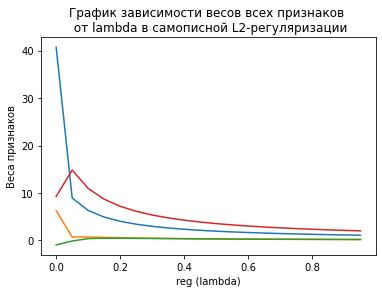

In [10]:
plt.plot(reg_list, W_list)
plt.title('График зависимости весов всех признаков \n от lambda в самописной L2-регуляризации')
#plt.xticks(np.arange(0, 101, 10))
plt.xlabel('reg (lambda)')
plt.ylabel('Веса признаков');

2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [11]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации L1
        #dReg = reg * W # градиент регуляризации L2
        W -= eta * dQ + dReg
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [12]:
W = gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [-0.36809983  1.43196959  0.96902048  1.60553793], error 3607.831743030555
Iter: 500, weights: [22.5686583   5.19280068 -7.29703878 19.60211317], error 40.98677947319007
Iter: 1000, weights: [27.54231874  6.07305543 -6.14380091 16.78605413], error 33.85503897932045
Iter: 1500, weights: [31.14416074  6.18806382 -4.7800287  14.72966742], error 30.007615938534173
Iter: 2000, weights: [33.84824458  6.21726268 -3.69835905 13.18397043], error 27.816017088226175
Iter: 2500, weights: [35.88880229  6.23326784 -2.87600874 12.01735876], error 26.565880304883326
Iter: 3000, weights: [37.42975364  6.24472151 -2.25436088 11.13635749], error 25.852688877864374
Iter: 3500, weights: [38.59353723  6.25330537 -1.78480221 10.4709905 ], error 25.44579286427558
Iter: 4000, weights: [39.4724819   6.25978134 -1.43016215  9.9684735 ], error 25.213629718948177
Iter: 4500, weights: [40.13630395  6.26467159 -1.16231987  9.58894803], error 25.081151286151353
Final MSE: 25.005545932370104


In [13]:
W_list = []
reg_list = []

for reg in np.arange(0, 1, 0.05):
    print(f'reg (lambda)={reg}')
    W = gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=reg)
    W_list.append(W)
    reg_list.append(reg)

reg (lambda)=0.0
Iter: 0, weights: [-0.2985468   0.40085232  1.19577723  1.29055794], error 3692.5964491722793
Iter: 500, weights: [22.72839135  5.14971233 -7.18954777 19.51133623], error 40.748390980827395
Iter: 1000, weights: [27.67816809  6.09022219 -6.10708996 16.71090353], error 33.694933116498916
Iter: 1500, weights: [31.25090381  6.21135392 -4.76147416 14.67136444], error 29.915909391083765
Iter: 2000, weights: [33.93184438  6.24104697 -3.689815   13.13892077], error 27.763035921545217
Iter: 2500, weights: [35.95480142  6.25699218 -2.87463683 11.98237418], error 26.535063518337495
Iter: 3000, weights: [37.48244711  6.26835514 -2.258365   11.10898035], error 25.834626714384406
Iter: 3500, weights: [38.63618027  6.27686573 -1.79286231 10.4493595 ], error 25.43509661229826
Iter: 4000, weights: [39.50753422  6.28328587 -1.44128507  9.95118233], error 25.207204098694014
Iter: 4500, weights: [40.16562337  6.2881339  -1.17575594  9.57493452], error 25.07721389897071
Final MSE: 25.00306

Iter: 2500, weights: [ 0.37507265 -0.38811547 -0.32614452 24.00981308], error 340.1493764650371
Iter: 3000, weights: [2.78765833e-01 1.69136469e-01 1.92112714e-02 2.40090201e+01], error 336.5425247508703
Iter: 3500, weights: [ 0.18011451 -0.05963935 -0.4152884  24.02055901], error 342.4536857245612
Iter: 4000, weights: [ 0.08495729 -0.30220114 -0.06447491 24.0260432 ], error 342.80712553268495
Iter: 4500, weights: [-1.90250222e-02  2.79192385e-01 -4.93676518e-01  2.40315450e+01], error 349.3301410303892
Final MSE: 344.9156757821342
reg (lambda)=0.45
Iter: 0, weights: [0.94824015 1.32420941 0.24960661 1.78422248], error 3259.7156457062288
Iter: 500, weights: [ 0.68491456 -0.30945035  0.28028587 23.3189185 ], error 386.41639838236347
Iter: 1000, weights: [ 0.70447974 -0.35918216 -0.15696832 23.32252175], error 380.5615533377048
Iter: 1500, weights: [ 0.72297283 -0.40414851  0.2886117  23.31407432], error 384.92505973775764
Iter: 2000, weights: [ 0.75213307 -0.46883892 -0.16440533 23.3228

Iter: 1500, weights: [6.22372717e-02 7.75696018e-01 1.42486858e-03 1.74361109e+01], error 752.0685218298406
Iter: 2000, weights: [ 1.25034237 -0.64806664 -0.10124986 17.51096669], error 777.1748841559504
Iter: 2500, weights: [ 0.65406845 -0.39530019 -0.19532614 17.44813439], error 719.4718248050527
Iter: 3000, weights: [ 0.05533799 -0.08371208 -0.23872245 17.41126955], error 756.3301122658111
Iter: 3500, weights: [ 1.19848418  0.31151623 -0.19749234 17.51078635], error 781.3730447713135
Iter: 4000, weights: [ 0.58308048  0.6201145  -0.22084174 17.46237382], error 723.0654155652762
Iter: 4500, weights: [ 9.71880483e-04  8.39086720e-01 -3.19429379e-01  1.74154302e+01], error 759.633447059051
Final MSE: 786.8869416503678
reg (lambda)=0.9
Iter: 0, weights: [1.08735878 1.04921899 0.33769478 3.51974837], error 2928.050887408591
Iter: 500, weights: [-0.09988631 -0.04381709  0.03618313 16.74166817], error 818.1324699585881
Iter: 1000, weights: [ 1.29031203  0.49500902  0.81450012 16.80836986],

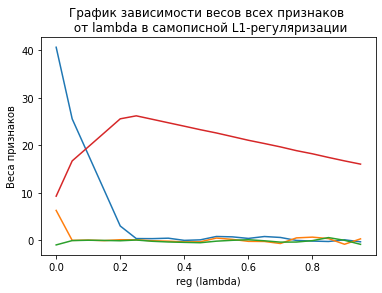

In [14]:
plt.plot(reg_list, W_list)
plt.title('График зависимости весов всех признаков \n от lambda в самописной L1-регуляризации')
#plt.xticks(np.arange(0, 101, 10))
plt.xlabel('reg (lambda)')
plt.ylabel('Веса признаков');

3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [27]:
# стандартизируем 2-й и 3-й признаки с изменением типа на float
X_st = X.copy().astype(np.float64)
X_norm = X.copy().astype(np.float64)
X_st[:, 1] = standart_scale(X_st[:, 1])
X_st[:, 2] = standart_scale(X_st[:, 2])
print(X_st)

# нормализуем стандартизированные 2-й и 3-й признаки
X_norm[:, 1] = normal_scale(X_st[:, 1])
X_norm[:, 2] = normal_scale(X_st[:, 2])
X_norm

[[ 1.         -0.70710678 -0.97958969  1.        ]
 [ 1.         -0.70710678 -0.56713087  1.        ]
 [ 1.         -0.35355339 -0.46401617  2.        ]
 [ 1.          0.70710678 -0.77336028  1.        ]
 [ 1.          0.          0.97958969  2.        ]
 [ 1.         -1.06066017 -0.36090146  1.        ]
 [ 1.          0.70710678  1.08270439  3.        ]
 [ 1.          2.47487373  2.11385144  3.        ]
 [ 1.         -0.70710678 -1.08270439  1.        ]
 [ 1.         -0.35355339  0.05155735  2.        ]]


array([[1.        , 0.1       , 0.03225806, 1.        ],
       [1.        , 0.1       , 0.16129032, 1.        ],
       [1.        , 0.2       , 0.19354839, 2.        ],
       [1.        , 0.5       , 0.09677419, 1.        ],
       [1.        , 0.3       , 0.64516129, 2.        ],
       [1.        , 0.        , 0.22580645, 1.        ],
       [1.        , 0.5       , 0.67741935, 3.        ],
       [1.        , 1.        , 1.        , 3.        ],
       [1.        , 0.1       , 0.        , 1.        ],
       [1.        , 0.2       , 0.35483871, 2.        ]])

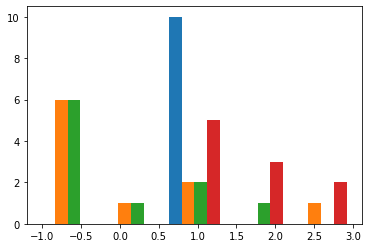

In [28]:
plt.hist(X_st, bins=5);

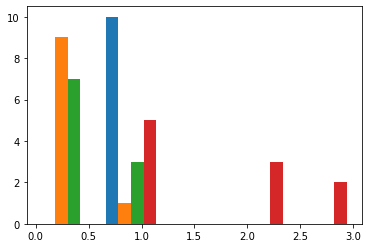

In [29]:
plt.hist(X_norm, bins=5);

4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

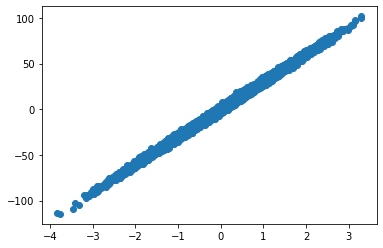

array(30.22449942)

In [18]:
# sklearn.datasets.make_regression(n_samples=100, n_features=100, *, n_informative=10, n_targets=1, bias=0.0,
#          effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)
from sklearn.datasets import make_regression
from matplotlib import pyplot
# generate regression dataset
X, y, coef = make_regression(n_samples=10000, n_features=1, noise=1.8, coef=True)
# plot regression dataset
pyplot.scatter(X, y)
pyplot.show()
coef

In [19]:
# градиентный спуск
def gradient_descent(X, y, iterations, eta):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    #global err_list_gd
    err_list_gd = []
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        err_list_gd.append(err)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, err_list_gd

In [20]:
W, err_list_gd = gradient_descent(X, y, iterations=50000, eta=1e-4)

Iter: 0, weights: [-0.25703846], error 930.5969066996995
Iter: 5000, weights: [18.98915081], error 128.8549479675317
Iter: 10000, weights: [26.0730409], error 20.24021567836604
Iter: 15000, weights: [28.68038815], error 5.525805459768788
Iter: 20000, weights: [29.64006703], error 3.5323938523568112
Iter: 25000, weights: [29.9932933], error 3.2623395465756118
Iter: 30000, weights: [30.12330429], error 3.225754363766445
Iter: 35000, weights: [30.17115707], error 3.220798043602221
Iter: 40000, weights: [30.1887701], error 3.220126593914559
Iter: 45000, weights: [30.19525288], error 3.2200356303229993
Final MSE: 3.220023307173341


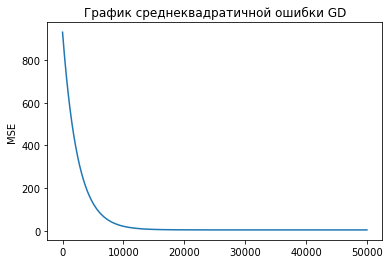

In [21]:
plt.plot(err_list_gd)
plt.title('График среднеквадратичной ошибки GD')
#plt.xticks(np.arange(0, 101, 10))
#plt.xlabel('reg (lambda)')
#plt.xlim(0, 100)
plt.ylabel('MSE');

In [22]:
# стохастический градиентный спуск
def stohastic_gradient_descent(X, y, iterations, batch_size, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    #global err_list_sgd
    err_list_sgd = []
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
    print(f'amount of batches is {n_batch}')
        
    for i in range(0, iterations):
        
        for b in range(n_batch):
            start = batch_size * b
            end = batch_size * (b + 1)
            
#             print(b, start, end)
            
            X_tmp = X[start : end, ]
            y_tmp = y[start : end]

            y_pred_tmp = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred_tmp)
            err_list_sgd.append(err)
            dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
            W -= (eta * dQ)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, err_list_sgd

In [23]:
W, err_list_sgd = stohastic_gradient_descent(X, y, iterations=50000, batch_size=100, eta=1e-2)

amount of batches is 100
Iter: 0, weights: [26.37172929], error 21.77728102411986
Iter: 5000, weights: [30.20502686], error 2.762135209859129
Iter: 10000, weights: [30.20502686], error 2.762135209859129
Iter: 15000, weights: [30.20502686], error 2.762135209859129
Iter: 20000, weights: [30.20502686], error 2.762135209859129
Iter: 25000, weights: [30.20502686], error 2.762135209859129
Iter: 30000, weights: [30.20502686], error 2.762135209859129
Iter: 35000, weights: [30.20502686], error 2.762135209859129
Iter: 40000, weights: [30.20502686], error 2.762135209859129
Iter: 45000, weights: [30.20502686], error 2.762135209859129
Final MSE: 3.220057331469392


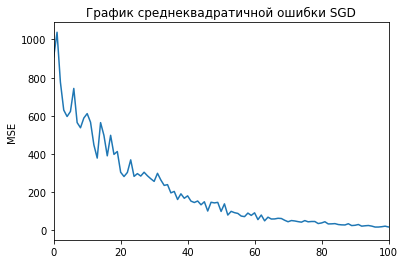

In [24]:
plt.plot(err_list_sgd)
plt.title('График среднеквадратичной ошибки SGD')
#plt.xticks(np.arange(0, 101, 10))
#plt.xlabel('reg (lambda)')
plt.xlim(0,100)
plt.ylabel('MSE');

Проект: 
1. https://www.kaggle.com/c/regression-tutors-expected-math-exam-results регрессия
1. https://www.kaggle.com/c/classification-choose-tutors классификация